In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.style as style 
style.use('tableau-colorblind10')

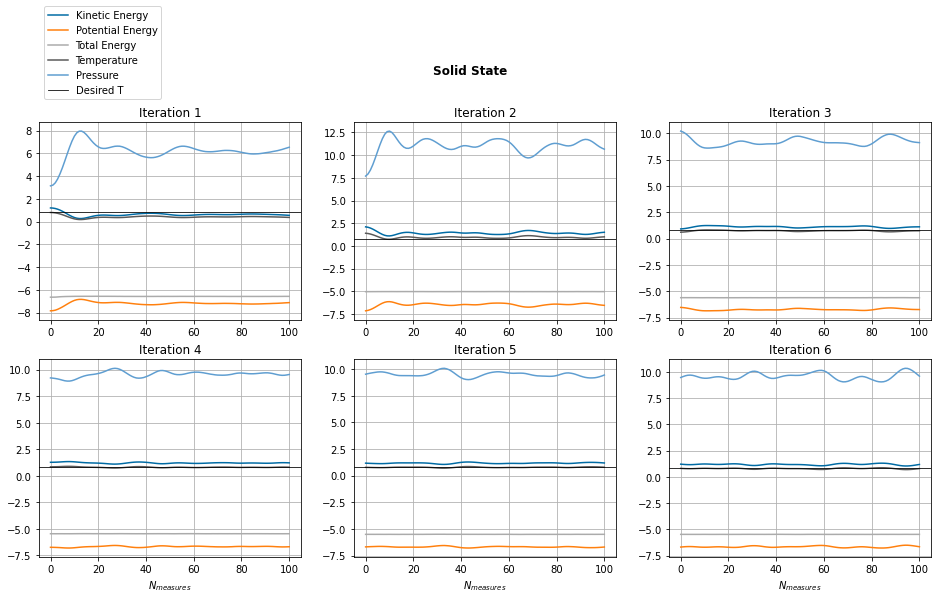

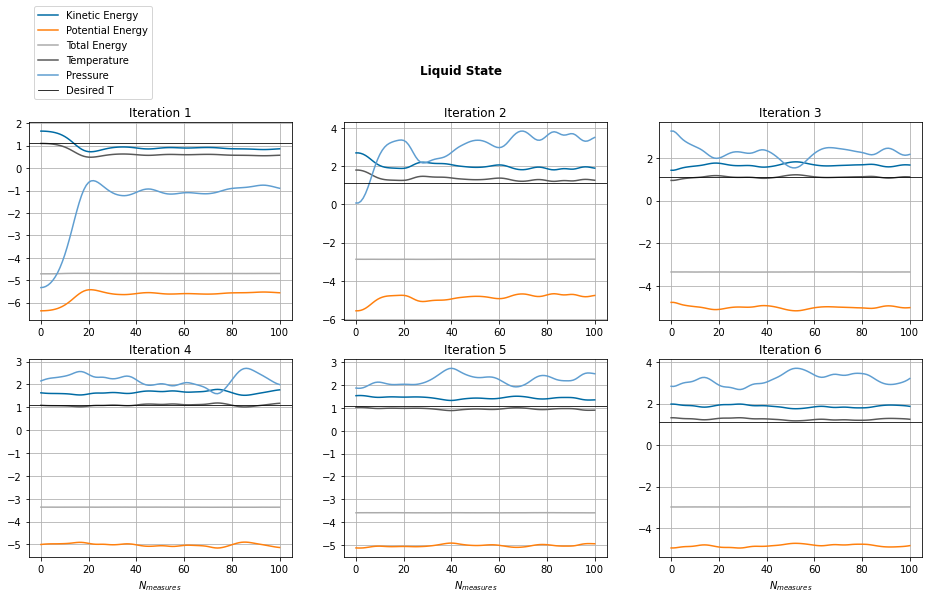

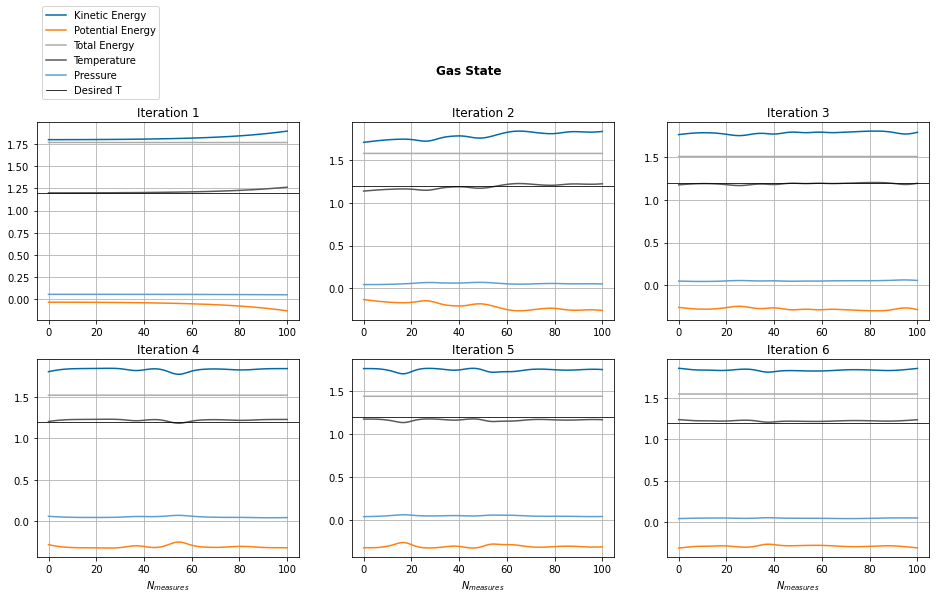

In [3]:
nG=6 #numbers of graphs (max 8)

def suptitle(state):
    if state=="solid": state="Solid"
    elif state=="liquid": state="Liquid"
    elif state=="gas": state="Gas"
    plt.suptitle(state+' State',size='large', weight='bold')
    print()

def state_equil(state,T_des):   #state is "solid", "liquid" or "gas"
    plt.figure(figsize=(16,8))
    step=1
    while step<=nG:

        ekin=np.genfromtxt('build/ex04.1/'+ state+ '/results'+str(step)+'/ekin.dat')
        epot=np.genfromtxt('build/ex04.1/'+ state+ '/results'+str(step)+'/epot.dat')
        etot=np.genfromtxt('build/ex04.1/'+ state+ '/results'+str(step)+'/etot.dat')
        temp=np.genfromtxt('build/ex04.1/'+ state+ '/results'+str(step)+'/temp.dat')
        press=np.genfromtxt('build/ex04.1/'+ state+ '/results'+str(step)+'/press.dat')
        mes=(ekin,epot,etot,temp,press)
        label=('Kinetic Energy','Potential Energy','Total Energy','Temperature','Pressure')
    
        plt.subplot(2,3,step)
        for i in range(5): plt.plot(mes[i],label=label[i])
        plt.axhline(y=T_des,color='k',linewidth=0.8,label='Desired T')
        if(step==1): plt.legend(loc='center left', bbox_to_anchor=(0, 1.35))
        if(step>3): plt.xlabel('$N_{measures}$')
        plt.title('Iteration '+str(step))
        plt.grid(True)    
        step+=1
    
    suptitle(state)
    plt.show()
    
state_equil("solid",0.8)
state_equil("liquid",1.1)
state_equil("gas",1.2)